## Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.

## Business Goal: 

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('day.csv')

df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
df.shape

(730, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
#Checking for duplicates
df.duplicated().sum()

0

In [8]:
df.nunique().sort_values()

yr              2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
mnth           12
temp          498
hum           594
casual        605
windspeed     649
registered    678
atemp         689
cnt           695
instant       730
dteday        730
dtype: int64

In [9]:
# Dropping unnecessary columns

df = df.drop(['instant', 'dteday', 'casual', 'registered'], axis = 1)

In [10]:
# Converting 'mnth' to categorical variable 

import calendar
df['mnth'] = df['mnth'].apply(lambda x: calendar.month_abbr[x])
df['mnth'].unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

In [11]:
# Converting 'Season' to a categorical variable
df['season'].replace([1, 2, 3, 4], ['Spring', 'Summer', 'Fall', 'Winter'], inplace = True)

In [12]:
df['season'].value_counts()

Fall      188
Summer    184
Spring    180
Winter    178
Name: season, dtype: int64

In [13]:
# Converting 'weathersit' to a categorical variable
df['weathersit'].replace([1, 2, 3], ['Clear', 'Mist_Cloudy', 'Light_Snow_Rain'], inplace = True)

In [14]:
df['weathersit'].value_counts()

Clear              463
Mist_Cloudy        246
Light_Snow_Rain     21
Name: weathersit, dtype: int64

In [15]:
# Converting 'weekday' to objectin preparation for making dummy variable
df['weekday'] = df['weekday'].astype('object')

In [16]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,1,1,Mist_Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,2,1,Mist_Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,3,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,4,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,5,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


### Univariate Analysis

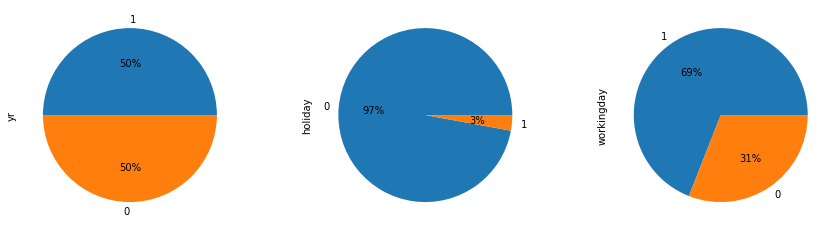

In [17]:
# Visualizing Binary Columns

plt.figure(figsize = [15,4])
plt.subplot(131)
df['yr'].value_counts(normalize = True).plot.pie(autopct = "%1.0f%%")
plt.subplot(132)
df['holiday'].value_counts(normalize = True).plot.pie(autopct = "%1.0f%%")
plt.subplot(133)
df['workingday'].value_counts(normalize = True).plot.pie(autopct = "%1.0f%%")
plt.show()

- 'Yr' is expected to be 50%-50% as the data is comprised of 2 year daily records of bike usage. 
- The high concentration of 0 value in holiday is due to significantly less number of holidays as compared to non-holidays. 
- The same case applies to 'workingday' due to higher number of days vs non-working days.

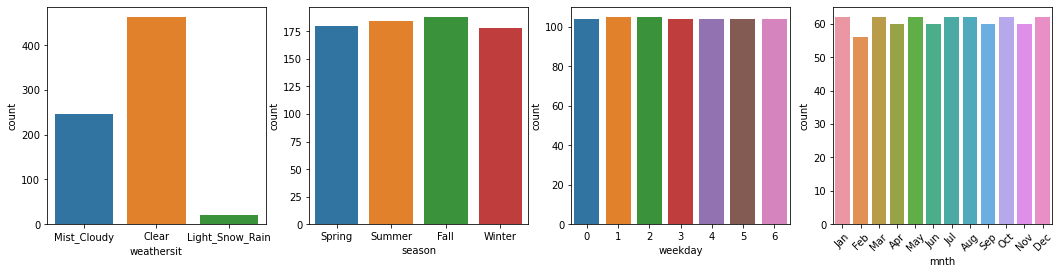

In [18]:
# Visualizing Categorical Columns

plt.figure(figsize = [18,4])
plt.subplot(141)
sns.countplot(data = df, x = 'weathersit')
plt.subplot(142)
sns.countplot(data = df, x = 'season')
plt.subplot(143)
sns.countplot(data = df, x = 'weekday')
plt.subplot(144)
plt.xticks(rotation = 45)
sns.countplot(data = df, x = 'mnth')
plt.show()

- 'weathersit' is mostly clear when the bikes are used. 
- The rest of the variables are having very close values.

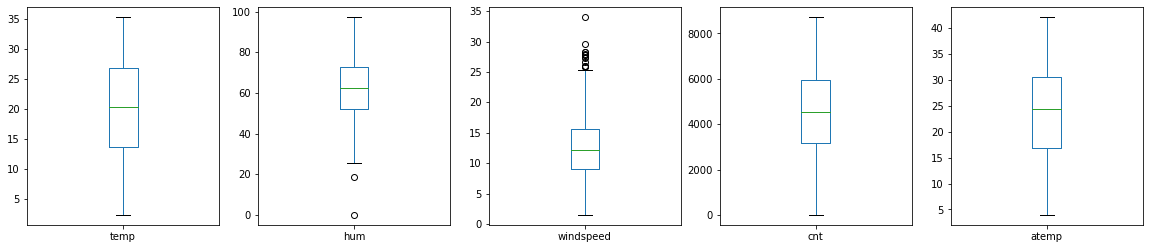

In [19]:
# Visualizing Numeric 

plt.figure(figsize = [20,4])
plt.subplot(151)
df['temp'].plot.box()
plt.subplot(152)
df['hum'].plot.box()
plt.subplot(153)
df['windspeed'].plot.box()
plt.subplot(154)
df['cnt'].plot.box()
plt.subplot(155)
df['atemp'].plot.box()
plt.show()

- 'windspeed' are having a lot of outliers. 
- The rest of the variables are having little to no outliers at all.

### Bivariate Analysis

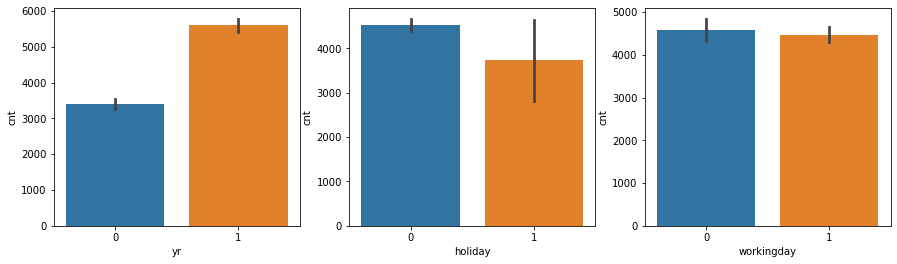

In [20]:
# Visualizing Binary Columns vs 'cnt'

plt.figure(figsize = [15,4])
plt.subplot(131)
sns.barplot('yr', 'cnt', data = df)
plt.subplot(132)
sns.barplot('holiday', 'cnt', data = df)
plt.subplot(133)
sns.barplot('workingday', 'cnt', data = df)
plt.show()

- There is a 64% increase in number of users from 2018 to 2019. 
- There are more users during holidays as compared to the days that are not. 
- There is a very little discrepancy between users of BoomBike on a working day and non-working day.

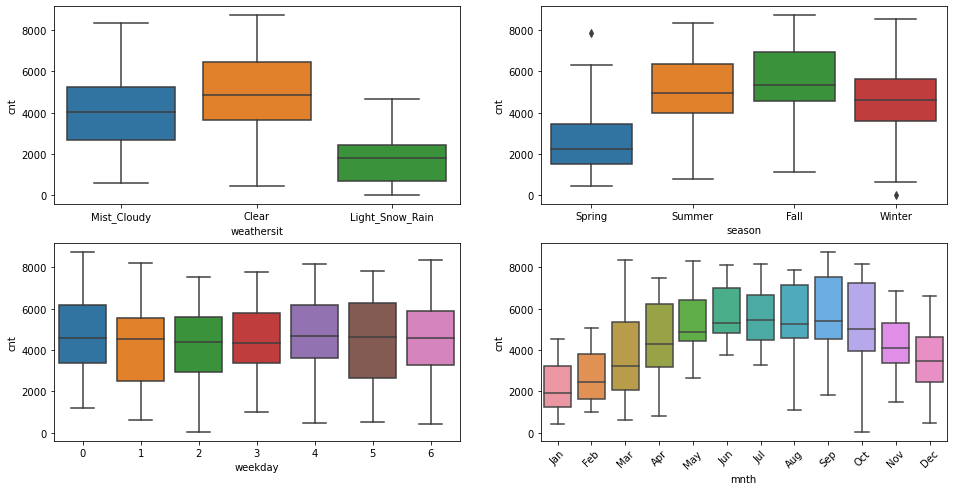

In [21]:
# Visualizing Categorical Columns vs 'cnt'

plt.figure(figsize = [16,8])
plt.subplot(221)
sns.boxplot(data = df, x = 'weathersit', y = 'cnt')
plt.subplot(222)
sns.boxplot(data = df, x = 'season', y = 'cnt')
plt.subplot(223)
sns.boxplot(data = df, x = 'weekday', y = 'cnt')
plt.subplot(224)
plt.xticks(rotation = 45)
sns.boxplot(data = df, x = 'mnth', y = 'cnt')
plt.show()

- There are more users of bike when the weather situation is clear.
- The least number of bike users can be observed during the Spring season while the peak is during Fall.
- Median usage of bike across all days of the week is almost similar but it can be observed that the highest is during 0 day (Sunday)
- With the same behavior as that of season, peak months are from August to October with highest in the month of September.

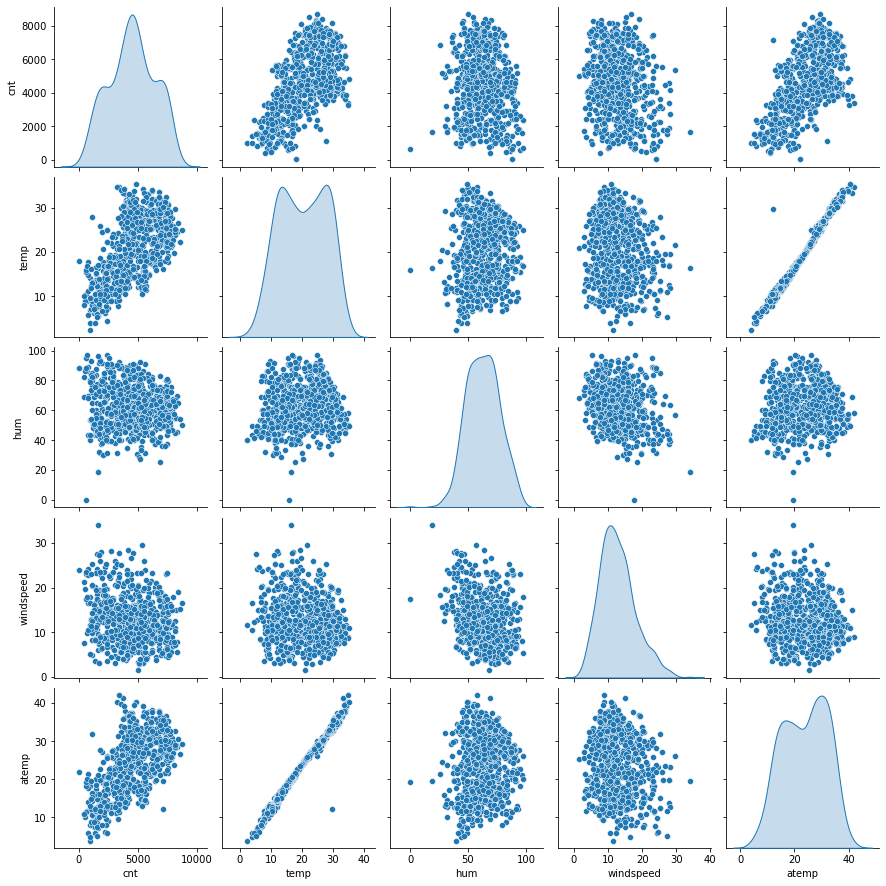

In [22]:
sns.pairplot(df[['cnt', 'temp','hum', 'windspeed', 'atemp']], diag_kind = 'kde')
plt.show()

- There is a strong correlation between 'temp' and 'atemp'. Only one will be used for the analysis.
- There is somewhat a positive corralation between 'cnt' and 'atemp' as well as between 'cnt' and 'temp'

# Creating Dummies

In [23]:
# creating dummies for nominal categorical variables

dummy_df = pd.get_dummies(df[['season', 'mnth', 'weekday', 'weathersit']], drop_first=True)
dummy_df.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Light_Snow_Rain,weathersit_Mist_Cloudy
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [24]:
# dropping the original columns of the dummy variables

df = pd.concat([df, dummy_df], axis = 1)
df = df.drop(['season', 'mnth', 'weekday', 'weathersit'], axis = 1)
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Light_Snow_Rain,weathersit_Mist_Cloudy
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,1,0,0,0


# Splitting the Data to Training and Test Sets

In [25]:
# dividing the dataset into two for model building

df_train, df_test = train_test_split(df, train_size = 0.7, random_state = 888)

In [26]:
# checking the structure of training data

df_train.shape

(510, 30)

In [27]:
# checking the structure of test data

df_test.shape

(220, 30)

# Scaling the Continuous Variables

In [28]:
scaler = MinMaxScaler()
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [29]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Light_Snow_Rain,weathersit_Mist_Cloudy
658,1,0,1,0.480491,0.491511,0.361176,0.359261,0.797141,0,0,...,1,0,1,0,0,0,0,0,0,0
460,1,0,0,0.400984,0.401258,0.173529,0.695194,0.754483,0,1,...,0,0,0,0,0,0,0,1,0,0
428,1,0,1,0.191874,0.195637,0.355882,0.516316,0.388023,1,0,...,0,0,0,1,0,0,0,0,0,0
207,0,0,1,0.886731,0.813473,0.210000,0.402796,0.543068,0,0,...,0,0,0,0,0,0,1,0,0,0
62,0,0,0,0.215835,0.215578,0.502941,0.452518,0.225243,1,0,...,0,0,0,0,0,0,0,0,0,1


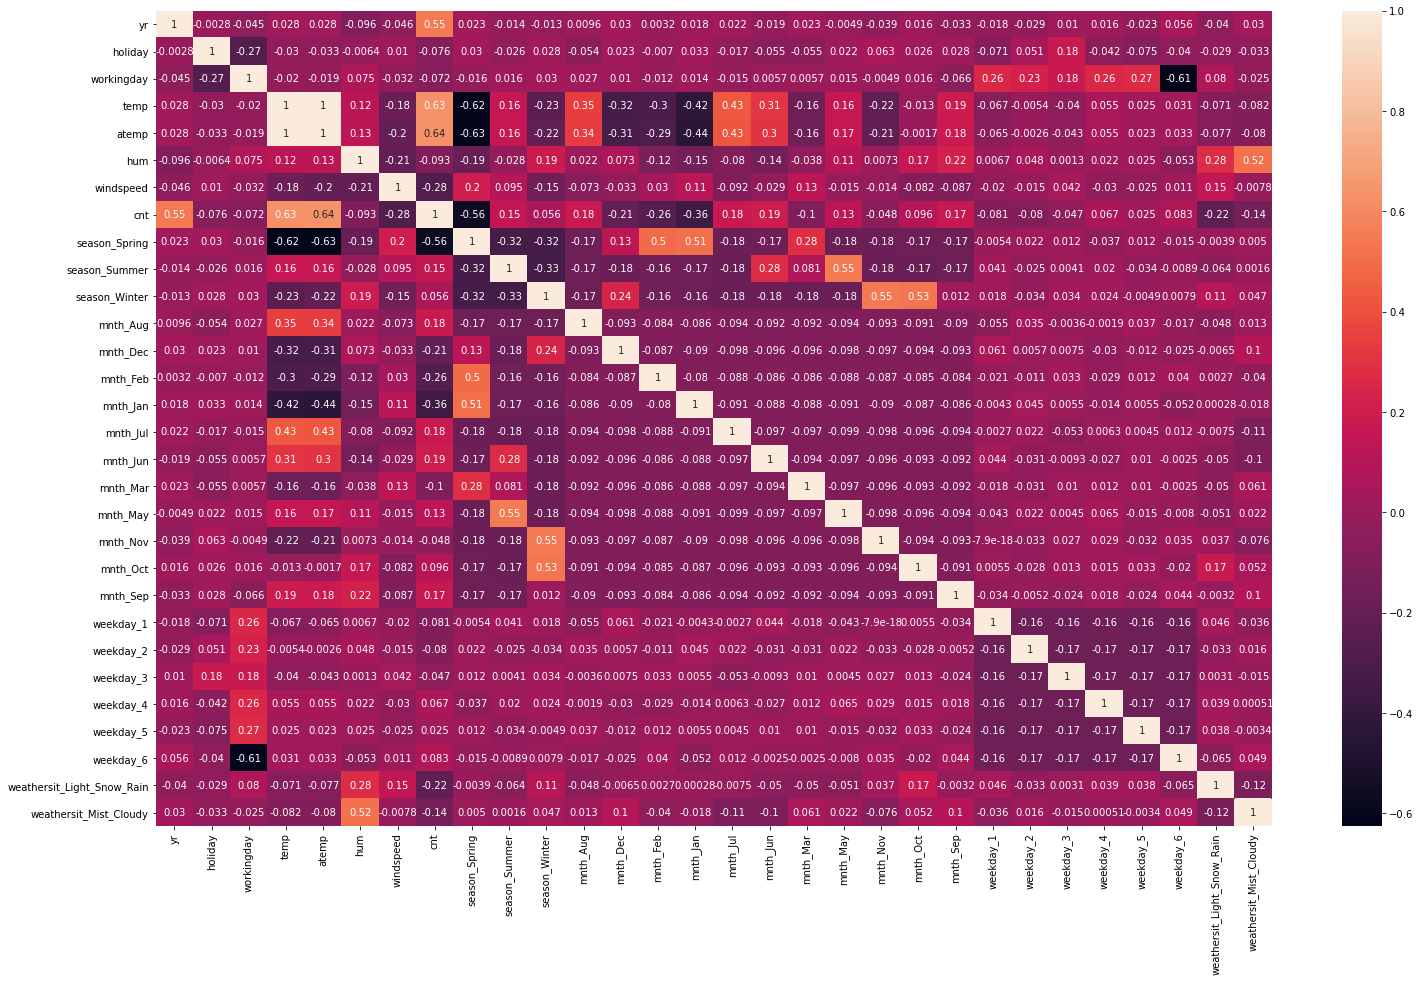

In [30]:
# checking the correlation of each variables

plt.figure(figsize = (25, 15))
sns.heatmap(df_train.corr(), annot = True)
plt.show()

- perfect correlation between 'temp' and 'atemp'
- observed relationships between 'temp'and 'atemp' on 'months' depending on the 'seasons'

# Model Building

In [31]:
y_train = df_train.pop('cnt')
X_train = df_train

## Recursive Feature Elimination

In [32]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

- This feature selection algorithm will be used to select the most relevant features in predicting the target variable.

In [33]:
# showing the ranks of all the features (15 features is selected and are ranked as 1)

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', False, 13),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', False, 15),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 10),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', True, 1),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 12),
 ('mnth_Mar', False, 14),
 ('mnth_May', False, 6),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 2),
 ('mnth_Sep', True, 1),
 ('weekday_1', False, 8),
 ('weekday_2', False, 9),
 ('weekday_3', False, 7),
 ('weekday_4', False, 5),
 ('weekday_5', False, 4),
 ('weekday_6', False, 11),
 ('weathersit_Light_Snow_Rain', True, 1),
 ('weathersit_Mist_Cloudy', True, 1)]

In [34]:
# these are the 15 features that will be used in building the model

col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'season_Spring',
       'season_Winter', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul',
       'mnth_Nov', 'mnth_Sep', 'weathersit_Light_Snow_Rain',
       'weathersit_Mist_Cloudy'],
      dtype='object')

In [35]:
# these are the variables that will be exculded in building the model

X_train.columns[~rfe.support_]

Index(['workingday', 'temp', 'season_Summer', 'mnth_Aug', 'mnth_Jun',
       'mnth_Mar', 'mnth_May', 'mnth_Oct', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6'],
      dtype='object')

In [36]:
X_train_rfe = X_train[col]
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     172.3
Date:                Mon, 10 May 2021   Prob (F-statistic):          3.50e-185
Time:                        22:45:46   Log-Likelihood:                 511.05
No. Observations:                 510   AIC:                            -990.1
Df Residuals:                     494   BIC:                            -922.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [37]:
X_train_new = X_train_rfe.drop(['mnth_Feb'], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     182.7
Date:                Mon, 10 May 2021   Prob (F-statistic):          3.36e-185
Time:                        22:45:49   Log-Likelihood:                 508.37
No. Observations:                 510   AIC:                            -986.7
Df Residuals:                     495   BIC:                            -923.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [38]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,49.40
3,atemp,3.63
6,season_Spring,2.77
7,season_Winter,2.24
4,hum,2.14
11,mnth_Nov,1.74
14,weathersit_Mist_Cloudy,1.72
9,mnth_Jan,1.55
8,mnth_Dec,1.43
13,weathersit_Light_Snow_Rain,1.38


In [39]:
X_train_new = X_train_new.drop(['hum'], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     185.4
Date:                Mon, 10 May 2021   Prob (F-statistic):          7.60e-181
Time:                        22:45:58   Log-Likelihood:                 495.26
No. Observations:                 510   AIC:                            -962.5
Df Residuals:                     496   BIC:                            -903.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [40]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,41.87
3,atemp,3.41
5,season_Spring,2.76
6,season_Winter,2.21
10,mnth_Nov,1.74
8,mnth_Jan,1.55
7,mnth_Dec,1.42
9,mnth_Jul,1.32
4,windspeed,1.13
11,mnth_Sep,1.11


In [41]:
X_train_new = X_train_new.drop(['windspeed'], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     193.4
Date:                Mon, 10 May 2021   Prob (F-statistic):          1.70e-178
Time:                        22:46:05   Log-Likelihood:                 486.93
No. Observations:                 510   AIC:                            -947.9
Df Residuals:                     497   BIC:                            -892.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [42]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,31.90
3,atemp,3.35
4,season_Spring,2.76
5,season_Winter,2.14
9,mnth_Nov,1.74
7,mnth_Jan,1.54
6,mnth_Dec,1.42
8,mnth_Jul,1.32
10,mnth_Sep,1.11
12,weathersit_Mist_Cloudy,1.07


In [43]:
X_train_new = X_train_new.drop(['mnth_Jan'], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     208.9
Date:                Mon, 10 May 2021   Prob (F-statistic):          1.37e-178
Time:                        22:46:12   Log-Likelihood:                 484.38
No. Observations:                 510   AIC:                            -944.8
Df Residuals:                     498   BIC:                            -893.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [44]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,29.50
3,atemp,3.06
4,season_Spring,2.65
5,season_Winter,2.14
8,mnth_Nov,1.71
6,mnth_Dec,1.31
7,mnth_Jul,1.30
9,mnth_Sep,1.11
11,weathersit_Mist_Cloudy,1.07
10,weathersit_Light_Snow_Rain,1.04


In [45]:
X_train_new = X_train_new.drop(['holiday'], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     223.9
Date:                Mon, 10 May 2021   Prob (F-statistic):          2.60e-177
Time:                        22:46:19   Log-Likelihood:                 478.54
No. Observations:                 510   AIC:                            -935.1
Df Residuals:                     499   BIC:                            -888.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [46]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,29.50
2,atemp,3.06
3,season_Spring,2.65
4,season_Winter,2.14
7,mnth_Nov,1.70
5,mnth_Dec,1.31
6,mnth_Jul,1.30
8,mnth_Sep,1.11
10,weathersit_Mist_Cloudy,1.06
9,weathersit_Light_Snow_Rain,1.04


In [47]:
X_train_new.columns

Index(['const', 'yr', 'atemp', 'season_Spring', 'season_Winter', 'mnth_Dec',
       'mnth_Jul', 'mnth_Nov', 'mnth_Sep', 'weathersit_Light_Snow_Rain',
       'weathersit_Mist_Cloudy'],
      dtype='object')

In [48]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [49]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,atemp,2.81
3,season_Winter,2.41
0,yr,2.02
6,mnth_Nov,1.75
9,weathersit_Mist_Cloudy,1.54
4,mnth_Dec,1.37
5,mnth_Jul,1.37
2,season_Spring,1.34
7,mnth_Sep,1.21
8,weathersit_Light_Snow_Rain,1.06


In [50]:
y_train_cnt = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

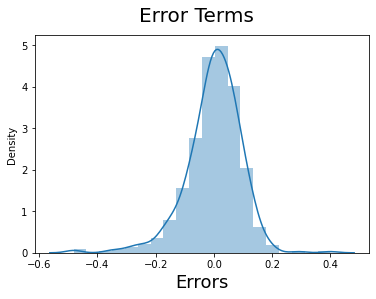

In [51]:
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  

# Plot heading 
plt.xlabel('Errors', fontsize = 18)  

# Making Predictions


In [52]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [53]:
y_test = df_test.pop('cnt')
X_test = df_test

In [54]:
X_test_new = X_test[X_train_new.columns]

In [55]:
X_test_new = sm.add_constant(X_test_new)

In [56]:
y_pred = lm.predict(X_test_new)

# Model Evaluation

Text(0, 0.5, 'y_pred')

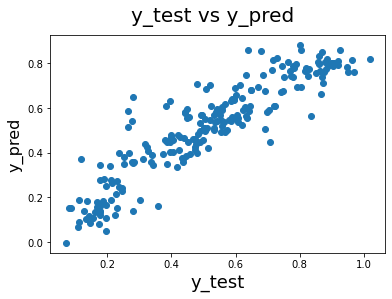

In [57]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)           

# Plot heading 
plt.xlabel('y_test', fontsize=18)                          

# X-label
plt.ylabel('y_pred', fontsize=16)  

In [58]:
r2 = r2_score(y_test, y_pred)
r2

0.8278452454557207

In [59]:
n = X_test.shape[0]

p = X_test.shape[1]

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.8015689934463307

Assumptions of Linear Regression:
- The error terms are normally distributed.
- The training and testing accuracy are nearly equal hence there is no Overfit/Underfit situation.
- The predicted values have linear relationship with the actual values.**